In [186]:
conda install -c conda-forge/label/gcc7 missingno

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::certifi-2019.11.28-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::certifi-2019.11.28-py37_0
  - anaconda/win-64::certifi-2019.11.28-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::ca-certificates-2020.1.1-0
  - anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::ca-certificates-2020.1.1-0, defaults/win-64::certifi-2019.11.28-py37_0
  - anaconda/win-64::certifi-2019.11.28-py37_0, defaults/win-64::ca-certificates-2020.1.1-0, defaults/win-64::openssl-1.1.1d-he774522_4
  - defaults/win-64::ca-certificates-2020.1.1-0, defaults/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda

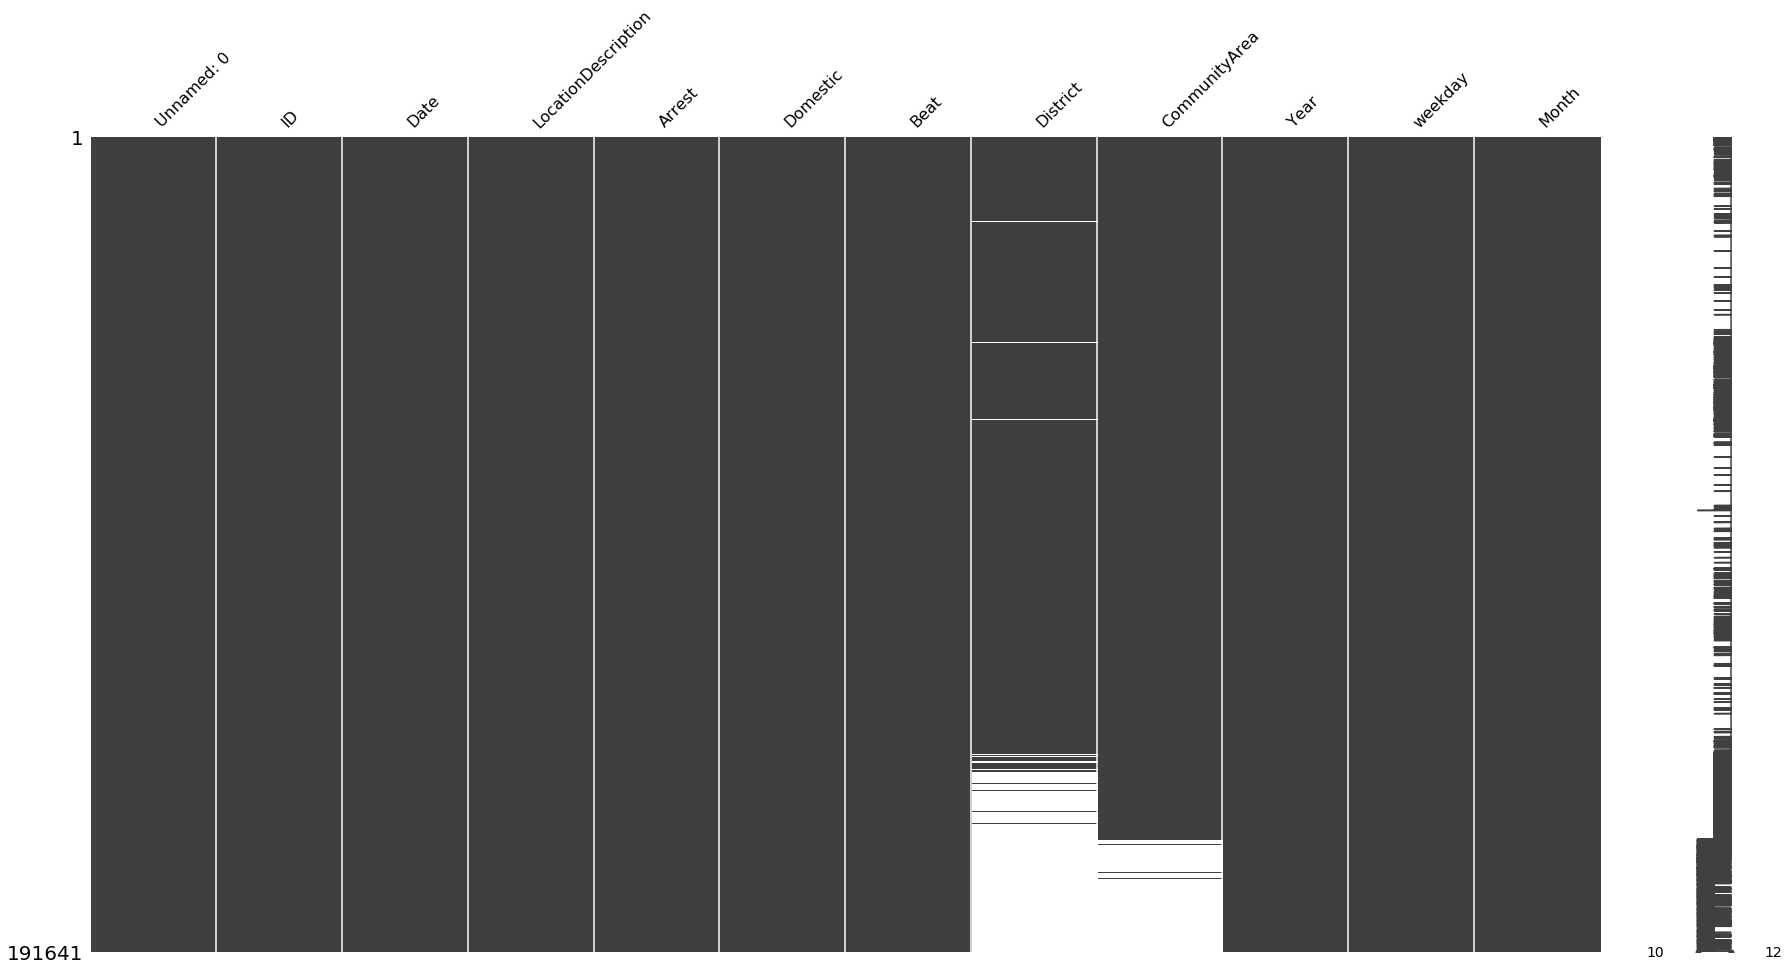

In [190]:
missingno.matrix(df, figsize = (30,15))

In [62]:
df=pd.read_csv('Chicago_Crime_Detective.csv')
df.head()

df['Date'] = df['Date'].apply(dateutil.parser.parse, dayfirst=True)
df.head()

C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012


In [63]:
len(df)
df.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012


In [64]:
df.describe()

,Unnamed: 0,ID,Beat,Year
count,191641.000000,1.916410e+05,191641.000000,191641.000000
mean,95820.000000,4.968629e+06,1258.810771,2006.134940
std,55322.135806,2.342997e+06,702.530465,3.520285
min,0.000000,1.310022e+06,111.000000,2001.000000
25%,47910.000000,2.832144e+06,722.000000,2003.000000
50%,95820.000000,4.762956e+06,1121.000000,2006.000000
75%,143730.000000,7.201878e+06,1733.000000,2009.000000
max,191640.000000,9.181151e+06,2535.000000,2012.000000


In [65]:
df.dtypes

Unnamed: 0                      int64
ID                              int64
Date                   datetime64[ns]
LocationDescription            object
Arrest                           bool
Domestic                         bool
Beat                            int64
District                       object
CommunityArea                  object
Year                            int64
dtype: object

In [66]:
df['Date'].describe()

count                  191641
unique                 131680
top       2008-05-16 00:00:00
freq                       11
first     2001-01-01 00:01:00
last      2012-12-31 23:15:00
Name: Date, dtype: object

In [67]:
date=list(df['Date'])
date=sorted(date)
print(date[len(date)//2])


2006-05-24 22:00:00


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191641 entries, 0 to 191640
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Unnamed: 0           191641 non-null  int64         
 1   ID                   191641 non-null  int64         
 2   Date                 191641 non-null  datetime64[ns]
 3   LocationDescription  191641 non-null  object        
 4   Arrest               191641 non-null  bool          
 5   Domestic             191641 non-null  bool          
 6   Beat                 191641 non-null  int64         
 7   District             148589 non-null  object        
 8   CommunityArea        167038 non-null  object        
 9   Year                 191641 non-null  int64         
dtypes: bool(2), datetime64[ns](1), int64(4), object(3)
memory usage: 12.1+ MB


In [69]:
df['weekday']=df['Date'].dt.dayofweek
df.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,weekday
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,0
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,0
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,0
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,0
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,0


In [70]:
df['Date'][500]
df['weekday'][500]

2

# 0->Monday

In [71]:
df.groupby('weekday').count()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
weekday,,,,,,,,,,
0,27372,27372,27372,27372,27372,27372,27372,21292,23878,27372
1,27141,27141,27141,27141,27141,27141,27141,21217,23770,27141
2,27387,27387,27387,27387,27387,27387,27387,21395,23985,27387
3,27067,27067,27067,27067,27067,27067,27067,20967,23587,27067
4,28545,28545,28545,28545,28545,28545,28545,22239,24960,28545
5,27406,27406,27406,27406,27406,27406,27406,20986,23791,27406
6,26723,26723,26723,26723,26723,26723,26723,20493,23067,26723


In [72]:
t=df['Date'].dt.to_period('M')
print(t)
print(type(t))

0         2012-12
1         2012-12
2         2012-12
3         2012-12
4         2012-12
           ...   
191636    2001-01
191637    2001-01
191638    2001-01
191639    2001-01
191640    2001-01
Name: Date, Length: 191641, dtype: period[M]
<class 'pandas.core.series.Series'>


In [73]:
print(type(t))

<class 'pandas.core.series.Series'>


In [74]:
t.dt.to_period('M')

AttributeError: 'PeriodProperties' object has no attribute 'to_period'

In [76]:
df['Month']=pd.DatetimeIndex(df['Date']).month

In [77]:
df.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,weekday,Month
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,0,12
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,0,12
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,0,12
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,0,12
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,0,12


In [153]:
df[df['Arrest']==True].groupby('Year').count()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,weekday,Month
Year,,,,,,,,,,,
2001,2152,2152,2152,2152,2152,2152,2152,3,36,2152,2152
2002,2115,2115,2115,2115,2115,2115,2115,23,1506,2115,2115
2003,1798,1798,1798,1798,1798,1798,1798,1415,1798,1798,1798
2004,1693,1693,1693,1693,1693,1693,1693,1691,1693,1693,1693
2005,1528,1528,1528,1528,1528,1528,1528,1523,1528,1528,1528
2006,1302,1302,1302,1302,1302,1302,1302,1301,1302,1302,1302
2007,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212
2008,1020,1020,1020,1020,1020,1020,1020,1013,1020,1020,1020
2009,840,840,840,840,840,840,840,833,839,840,840


2001    20669
2002    18753
2004    16862
2003    16657
2005    16484
2006    16098
2011    15637
2010    15497
2008    14445
2007    14280
2012    14092
2009    12167
Name: Year, dtype: int64


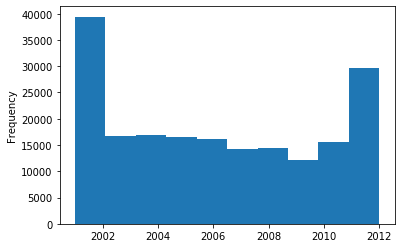

In [155]:
print(df['Year'].value_counts())
df['Year'].plot.hist()
y=df['Year'].value_counts()

[20669 18753 16862 16657 16484 16098 15637 15497 14445 14280 14092 12167]
[2001 2002 2004 2003 2005 2006 2011 2010 2008 2007 2012 2009]


<BarContainer object of 12 artists>

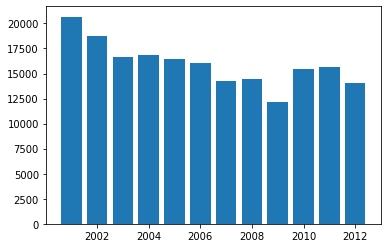

In [147]:

r=np.asarray(y)

s=y.index
print(r)
s=np.asarray(s)
print(s)
plt.bar(s,r)

In [166]:
print(df['LocationDescription'].value_counts().head(6))

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
OTHER                               4573
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
Name: LocationDescription, dtype: int64


In [176]:
df[(df.'LocationDescription' == "STREET") or (df.'LocationDescription' == "PARKING LOT/GARAGE(NON.RESID.)")]

SyntaxError: invalid syntax (<ipython-input-176-9ec537ca8b29>, line 1)

In [179]:
Top5=df[df['LocationDescription'].isin(["STREET","PARKING LOT/GARAGE(NON.RESID.)","ALLEY","GAS STATION","DRIVEWAY - RESIDENTIAL"])]

In [180]:
print(len(Top5))

177510


In [181]:
Top5.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,weekday,Month
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,0,12
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,0,12
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,0,12
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,0,12
5,5,8950793,2012-12-31 20:30:00,STREET,True,False,2521,25,19,2012,0,12


In [182]:
Topgas=df[df['LocationDescription']=='GAS STATION']
Topgas.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,weekday,Month
13,13,8950570,2012-12-31 16:20:00,GAS STATION,True,False,825,8,66,2012,0,12
106,106,8948353,2012-12-29 10:00:00,GAS STATION,False,False,823,8,66,2012,5,12
213,213,8945802,2012-12-27 10:00:00,GAS STATION,False,False,321,3,42,2012,3,12
278,278,8943877,2012-12-25 10:00:00,GAS STATION,False,False,332,3,43,2012,1,12
290,290,8943595,2012-12-24 21:55:00,GAS STATION,False,False,421,4,43,2012,0,12


In [183]:
Topgas['weekday'].value_counts()

5    345
6    318
4    316
2    294
0    287
3    282
1    269
Name: weekday, dtype: int64

In [184]:
conda install -c conda-forge missingno

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::certifi-2019.11.28-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::certifi-2019.11.28-py37_0
  - anaconda/win-64::ca-certificates-2020.1.1-0, defaults/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::ca-certificates-2020.1.1-0, defaults/win-64::certifi-2019.11.28-py37_0
  - defaults/win-64::ca-certificates-2020.1.1-0, defaults/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::certifi-2019.11.28-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::ca-certificates-2020.1.1-0
  - anaconda